Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


Load Dataset

In [3]:
# Load the dataset
file_path = 'hbase_bugs.csv'  # Update with your actual file path
df = pd.read_csv(file_path)
df.head()

,Summary,Issue id,Status,Priority,Resolution,Created,Resolved,Affects Version/s,Description
0,shaded mapreduce and shaded byo-hadoop client ...,13434743,Resolved,Blocker,Fixed,20/Mar/22 14:07,30/Mar/22 22:09,2.5.0,After fixing the logging problem in HBASE-2687...
1,"Netty ""leak detected"" and OutOfDirectMemoryErr...",13424759,Resolved,Blocker,Fixed,25/Jan/22 18:36,07/Jul/22 08:31,2.4.6,"Under constant data ingestion, using default N..."
2,Backport the log4j2 changes to branch-2,13432116,Resolved,Blocker,Fixed,05/Mar/22 01:42,11/Mar/22 19:46,NaN,"One thing is that, we'd better make sure that ..."
3,Missing opentelemetry agent in hadoop-two-comp...,13432167,Resolved,Blocker,Fixed,05/Mar/22 13:40,10/Mar/22 20:06,2.5.0,We do not have hadoop-two-compat.xml on master...
4,The way we bypass broken track file is not eno...,13424163,Resolved,Critical,Fixed,22/Jan/22 15:23,25/Jan/22 07:22,NaN,"When implementing HBASE-26690, I found that a ..."


Distribution of Key Attributes (Status, Priority, Resolution)

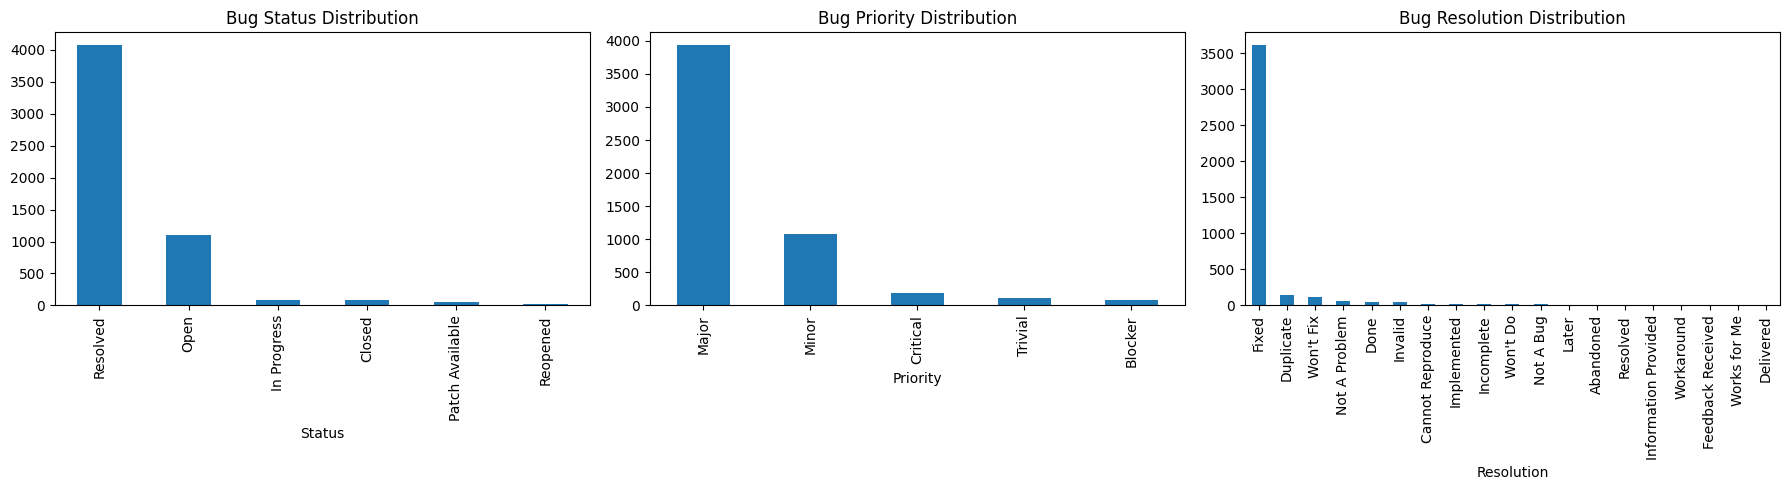

In [4]:
# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bug Status Distribution
df['Status'].value_counts().plot(kind='bar', ax=axes[0], title='Bug Status Distribution')

# Bug Priority Distribution
df['Priority'].value_counts().plot(kind='bar', ax=axes[1], title='Bug Priority Distribution')

# Bug Resolution Distribution
df['Resolution'].value_counts().plot(kind='bar', ax=axes[2], title='Bug Resolution Distribution')

plt.tight_layout()
plt.show()


Temporal Analysis - Bug Reports Over Time

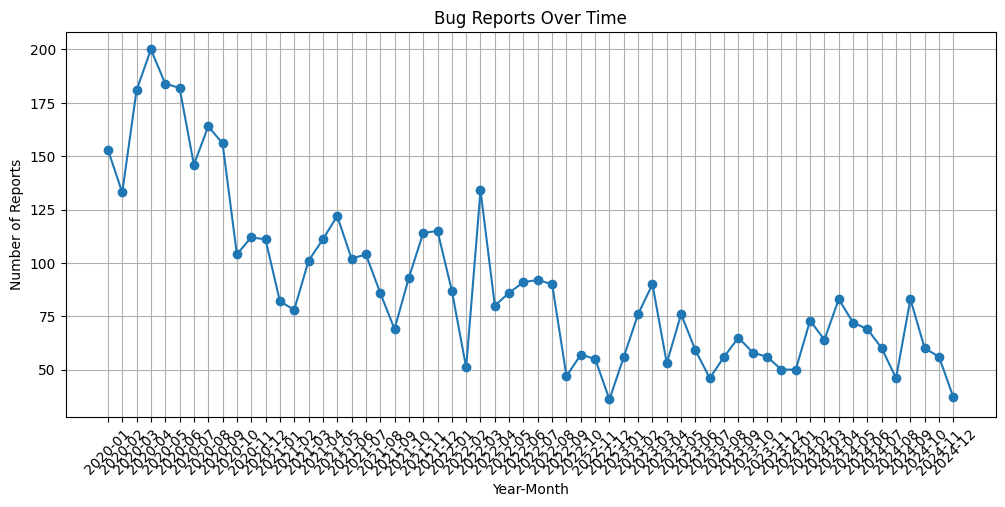

In [6]:
# Convert date columns
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')

# Extract year-month
df['Created_YearMonth'] = df['Created'].dt.tz_localize(None).dt.to_period('M')
# df['Created_YearMonth'] = df['Created'].dt.to_period('M')

# Count bug reports per month
bug_report_trend = df['Created_YearMonth'].value_counts().sort_index()

# Plot bug report trends
plt.figure(figsize=(12, 5))
plt.plot(bug_report_trend.index.astype(str), bug_report_trend.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Bug Reports Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.grid()
plt.show()


Resolution Time Analysis

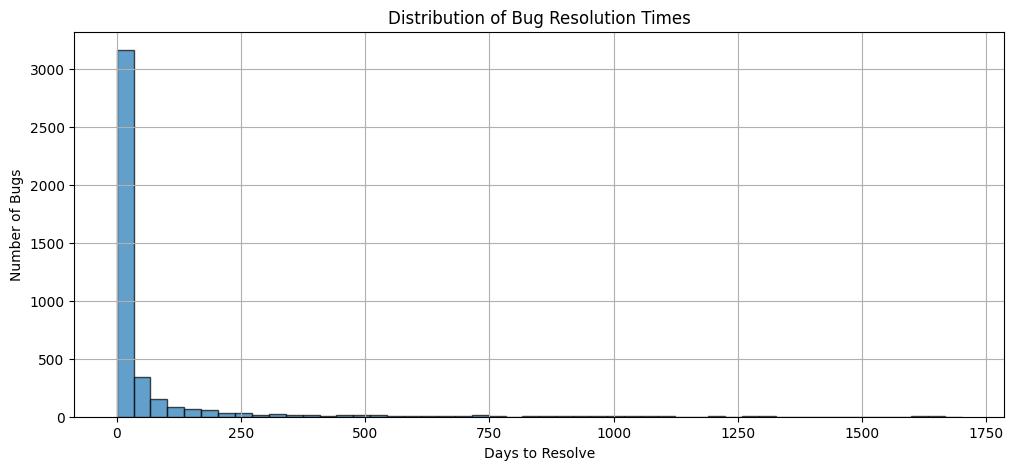

In [7]:
# Calculate resolution time
df['Resolution_Time'] = (df['Resolved'] - df['Created']).dt.days

# Plot distribution
plt.figure(figsize=(12, 5))
plt.hist(df['Resolution_Time'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bug Resolution Times')
plt.xlabel('Days to Resolve')
plt.ylabel('Number of Bugs')
plt.grid()
plt.show()


Word Cloud for Bug Descriptions
python
Copy
Edit


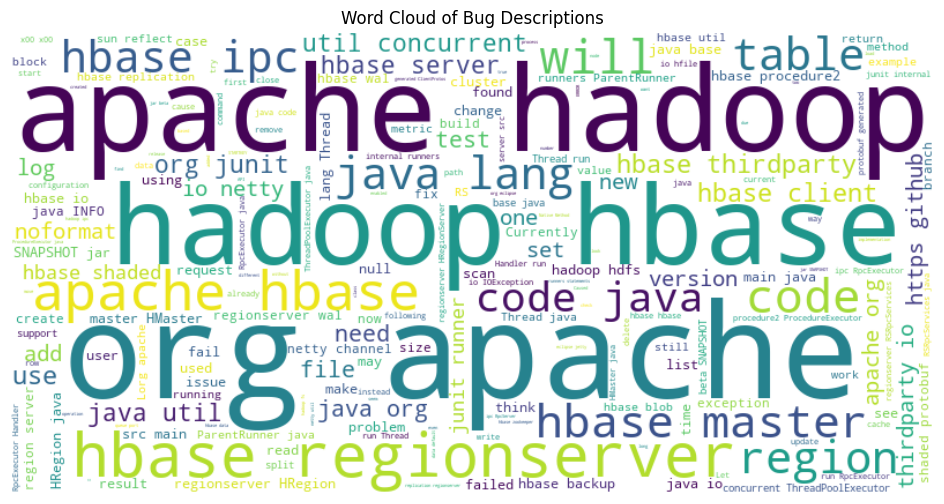

In [8]:
# Word Cloud for bug descriptions
text_data = ' '.join(str(desc) for desc in df['Description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bug Descriptions')
plt.show()
